# Importing libraries and Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import time
import cmath

In [2]:
df = pd.read_csv("Dataset\Training.csv")
test_df = pd.read_csv("Dataset\Testing.csv")

# EDA

In [3]:
df.head(3)

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  scurring  \
0       0           0             0        0                 0  ...         0   
1       0           0             0        0                 0  ...         0   
2       0           0             0        0                 0  ...         0   

   skin_peeling  silver_like_dusting  small_dents_in_nails  \
0             0                    0                     0   
1             0                    0                     0   
2             0                    0                     0   

   inflammatory_nails  blister  red_sore_around_nose  yellow_crust_ooze  \
0                   0        0                     0                  0   
1                   0        0                     0                  0   
2                   0        0                     0                  0   

          prognosis  Unnamed: 133  
0  Fungal infection           NaN  
1  Fungal infection           NaN  
2  Fungal infection           NaN  

[3 rows x 134 columns]

In [4]:
#for train dataset
df.dtypes

itching                   int64
skin_rash                 int64
nodal_skin_eruptions      int64
continuous_sneezing       int64
shivering                 int64
                         ...   
blister                   int64
red_sore_around_nose      int64
yellow_crust_ooze         int64
prognosis                object
Unnamed: 133            float64
Length: 134, dtype: object

In [5]:
#for test dataset
test_df.dtypes

itching                  int64
skin_rash                int64
nodal_skin_eruptions     int64
continuous_sneezing      int64
shivering                int64
                         ...  
inflammatory_nails       int64
blister                  int64
red_sore_around_nose     int64
yellow_crust_ooze        int64
prognosis               object
Length: 133, dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [7]:
df.describe()

itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  4920.000000  4920.000000           4920.000000          4920.000000   
mean      0.137805     0.159756              0.021951             0.045122   
std       0.344730     0.366417              0.146539             0.207593   
min       0.000000     0.000000              0.000000             0.000000   
25%       0.000000     0.000000              0.000000             0.000000   
50%       0.000000     0.000000              0.000000             0.000000   
75%       0.000000     0.000000              0.000000             0.000000   
max       1.000000     1.000000              1.000000             1.000000   

         shivering       chills   joint_pain  stomach_pain      acidity  \
count  4920.000000  4920.000000  4920.000000   4920.000000  4920.000000   
mean      0.021951     0.162195     0.139024      0.045122     0.045122   
std       0.146539     0.368667     0.346007      0.207593     0.207593   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%       0.000000     0.000000     0.000000      0.000000     0.000000   
50%       0.000000     0.000000     0.000000      0.000000     0.000000   
75%       0.000000     0.000000     0.000000      0.000000     0.000000   
max       1.000000     1.000000     1.000000      1.000000     1.000000   

       ulcers_on_tongue  ...   blackheads     scurring  skin_peeling  \
count       4920.000000  ...  4920.000000  4920.000000   4920.000000   
mean           0.021951  ...     0.021951     0.021951      0.023171   
std            0.146539  ...     0.146539     0.146539      0.150461   
min            0.000000  ...     0.000000     0.000000      0.000000   
25%            0.000000  ...     0.000000     0.000000      0.000000   
50%            0.000000  ...     0.000000     0.000000      0.000000   
75%            0.000000  ...     0.000000     0.000000      0.000000   
max            1.000000  ...     1.000000     1.000000      1.000000   

       silver_like_dusting  small_dents_in_nails  inflammatory_nails  \
count          4920.000000           4920.000000         4920.000000   
mean              0.023171              0.023171            0.023171   
std               0.150461              0.150461            0.150461   
min               0.000000              0.000000            0.000000   
25%               0.000000              0.000000            0.000000   
50%               0.000000              0.000000            0.000000   
75%               0.000000              0.000000            0.000000   
max               1.000000              1.000000            1.000000   

           blister  red_sore_around_nose  yellow_crust_ooze  Unnamed: 133  
count  4920.000000           4920.000000        4920.000000           0.0  
mean      0.023171              0.023171           0.023171           NaN  
std       0.150461              0.150461           0.150461           NaN  
min       0.000000              0.000000           0.000000           NaN  
25%       0.000000              0.000000           0.000000           NaN  
50%       0.000000              0.000000           0.000000           NaN  
75%       0.000000              0.000000           0.000000           NaN  
max       1.000000              1.000000           1.000000           NaN  

[8 rows x 133 columns]

In [8]:
df.shape

(4920, 134)

In [9]:
df.groupby("prognosis").mean()

itching  skin_rash  \
prognosis                                                     
(vertigo) Paroymsal  Positional Vertigo     0.00       0.00   
AIDS                                        0.00       0.00   
Acne                                        0.00       0.95   
Alcoholic hepatitis                         0.00       0.00   
Allergy                                     0.00       0.00   
Arthritis                                   0.00       0.00   
Bronchial Asthma                            0.00       0.00   
Cervical spondylosis                        0.00       0.00   
Chicken pox                                 0.95       0.95   
Chronic cholestasis                         0.95       0.00   
Common Cold                                 0.00       0.00   
Dengue                                      0.00       0.95   
Diabetes                                    0.00       0.00   
Dimorphic hemmorhoids(piles)                0.00       0.00   
Drug Reaction                               0.95       0.90   
Fungal infection                            0.90       0.90   
GERD                                        0.00       0.00   
Gastroenteritis                             0.00       0.00   
Heart attack                                0.00       0.00   
Hepatitis B                                 0.95       0.00   
Hepatitis C                                 0.00       0.00   
Hepatitis D                                 0.00       0.00   
Hepatitis E                                 0.00       0.00   
Hypertension                                0.00       0.00   
Hyperthyroidism                             0.00       0.00   
Hypoglycemia                                0.00       0.00   
Hypothyroidism                              0.00       0.00   
Impetigo                                    0.00       0.95   
Jaundice                                    0.95       0.00   
Malaria                                     0.00       0.00   
Migraine                                    0.00       0.00   
Osteoarthristis                             0.00       0.00   
Paralysis (brain hemorrhage)                0.00       0.00   
Peptic ulcer diseae                         0.00       0.00   
Pneumonia                                   0.00       0.00   
Psoriasis                                   0.00       0.95   
Tuberculosis                                0.00       0.00   
Typhoid                                     0.00       0.00   
Urinary tract infection                     0.00       0.00   
Varicose veins                              0.00       0.00   
hepatitis A                                 0.00       0.00   

                                         nodal_skin_eruptions  \
prognosis                                                       
(vertigo) Paroymsal  Positional Vertigo                   0.0   
AIDS                                                      0.0   
Acne                                                      0.0   
Alcoholic hepatitis                                       0.0   
Allergy                                                   0.0   
Arthritis                                                 0.0   
Bronchial Asthma                                          0.0   
Cervical spondylosis                                      0.0   
Chicken pox                                               0.0   
Chronic cholestasis                                       0.0   
Common Cold                                               0.0   
Dengue                                                    0.0   
Diabetes                                                  0.0   
Dimorphic hemmorhoids(piles)                              0.0   
Drug Reaction                                             0.0   
Fungal infection                                          0.9   
GERD                                                      0.0   
Gastroenteritis                                           0.0   
Heart attack                   

In [10]:
df["prognosis"].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

In [11]:
4920/41

120.0

# Data Cleaning

In [12]:
df.drop("Unnamed: 133",inplace=True,axis=1)

In [13]:
df.head(2)

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             0                    0   
1           0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   

   yellow_crust_ooze         prognosis  
0                  0  Fungal infection  
1                  0  Fungal infection  

[2 rows x 133 columns]

# Visualisation

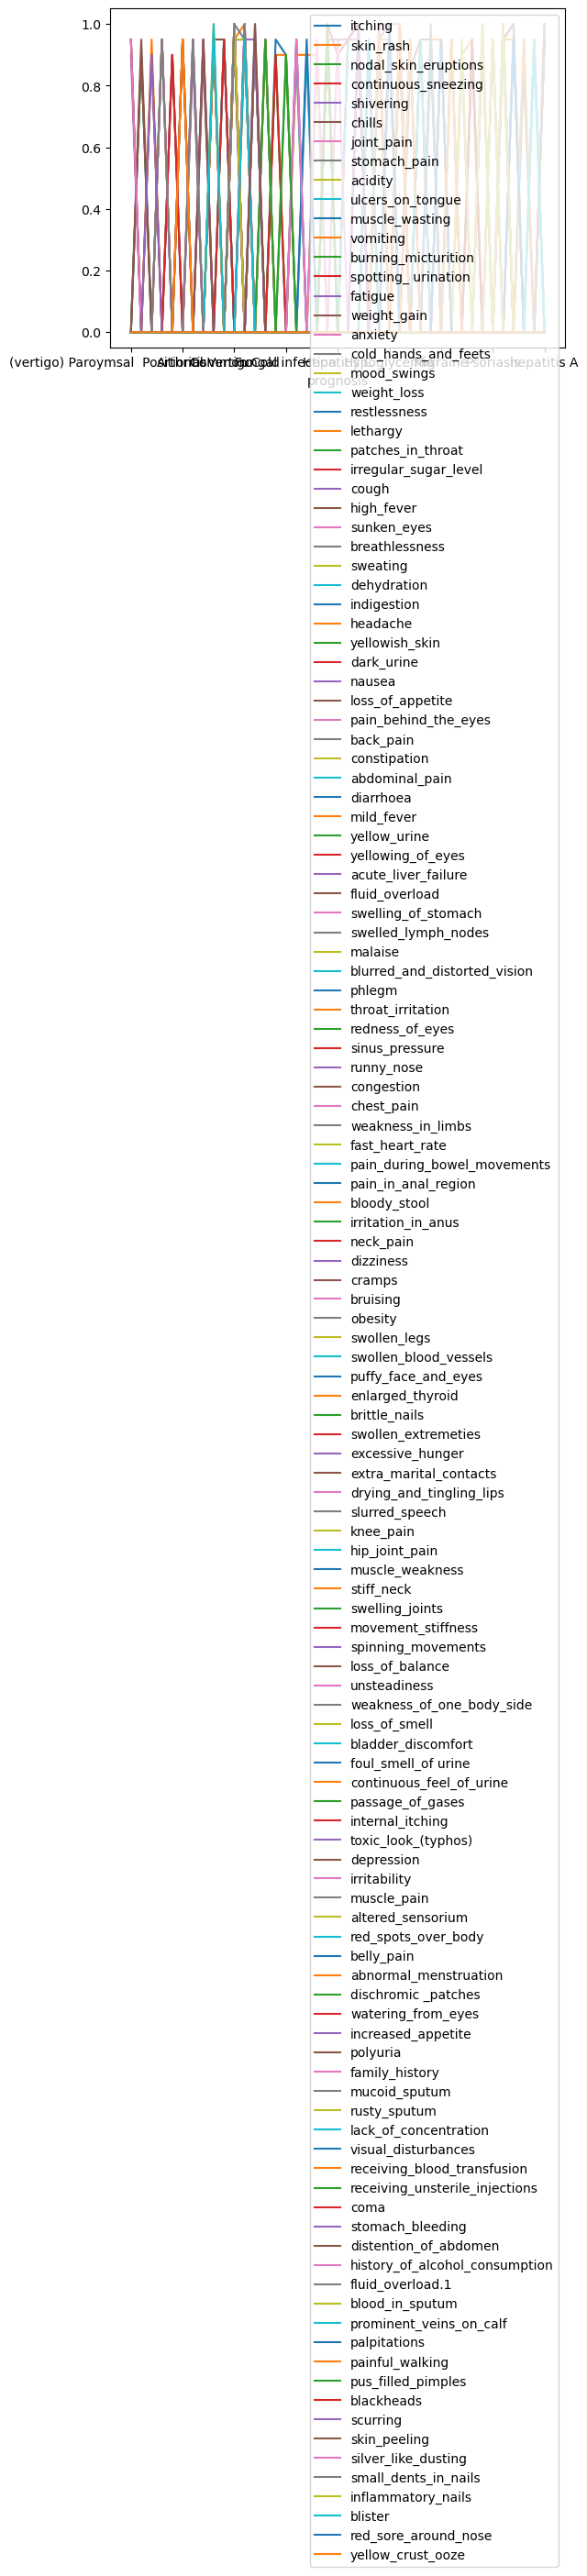

In [14]:
df.groupby('prognosis').mean().plot()
plt.show()

In [18]:
#checking the relationship between the variables by applying the correlation 
corr = df.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
plt.subplots_adjust(left = 0.5, right = 16 , top = 20, bottom = 0.5)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

<AxesSubplot:>

In [15]:
import warnings
warnings.filterwarnings('ignore')


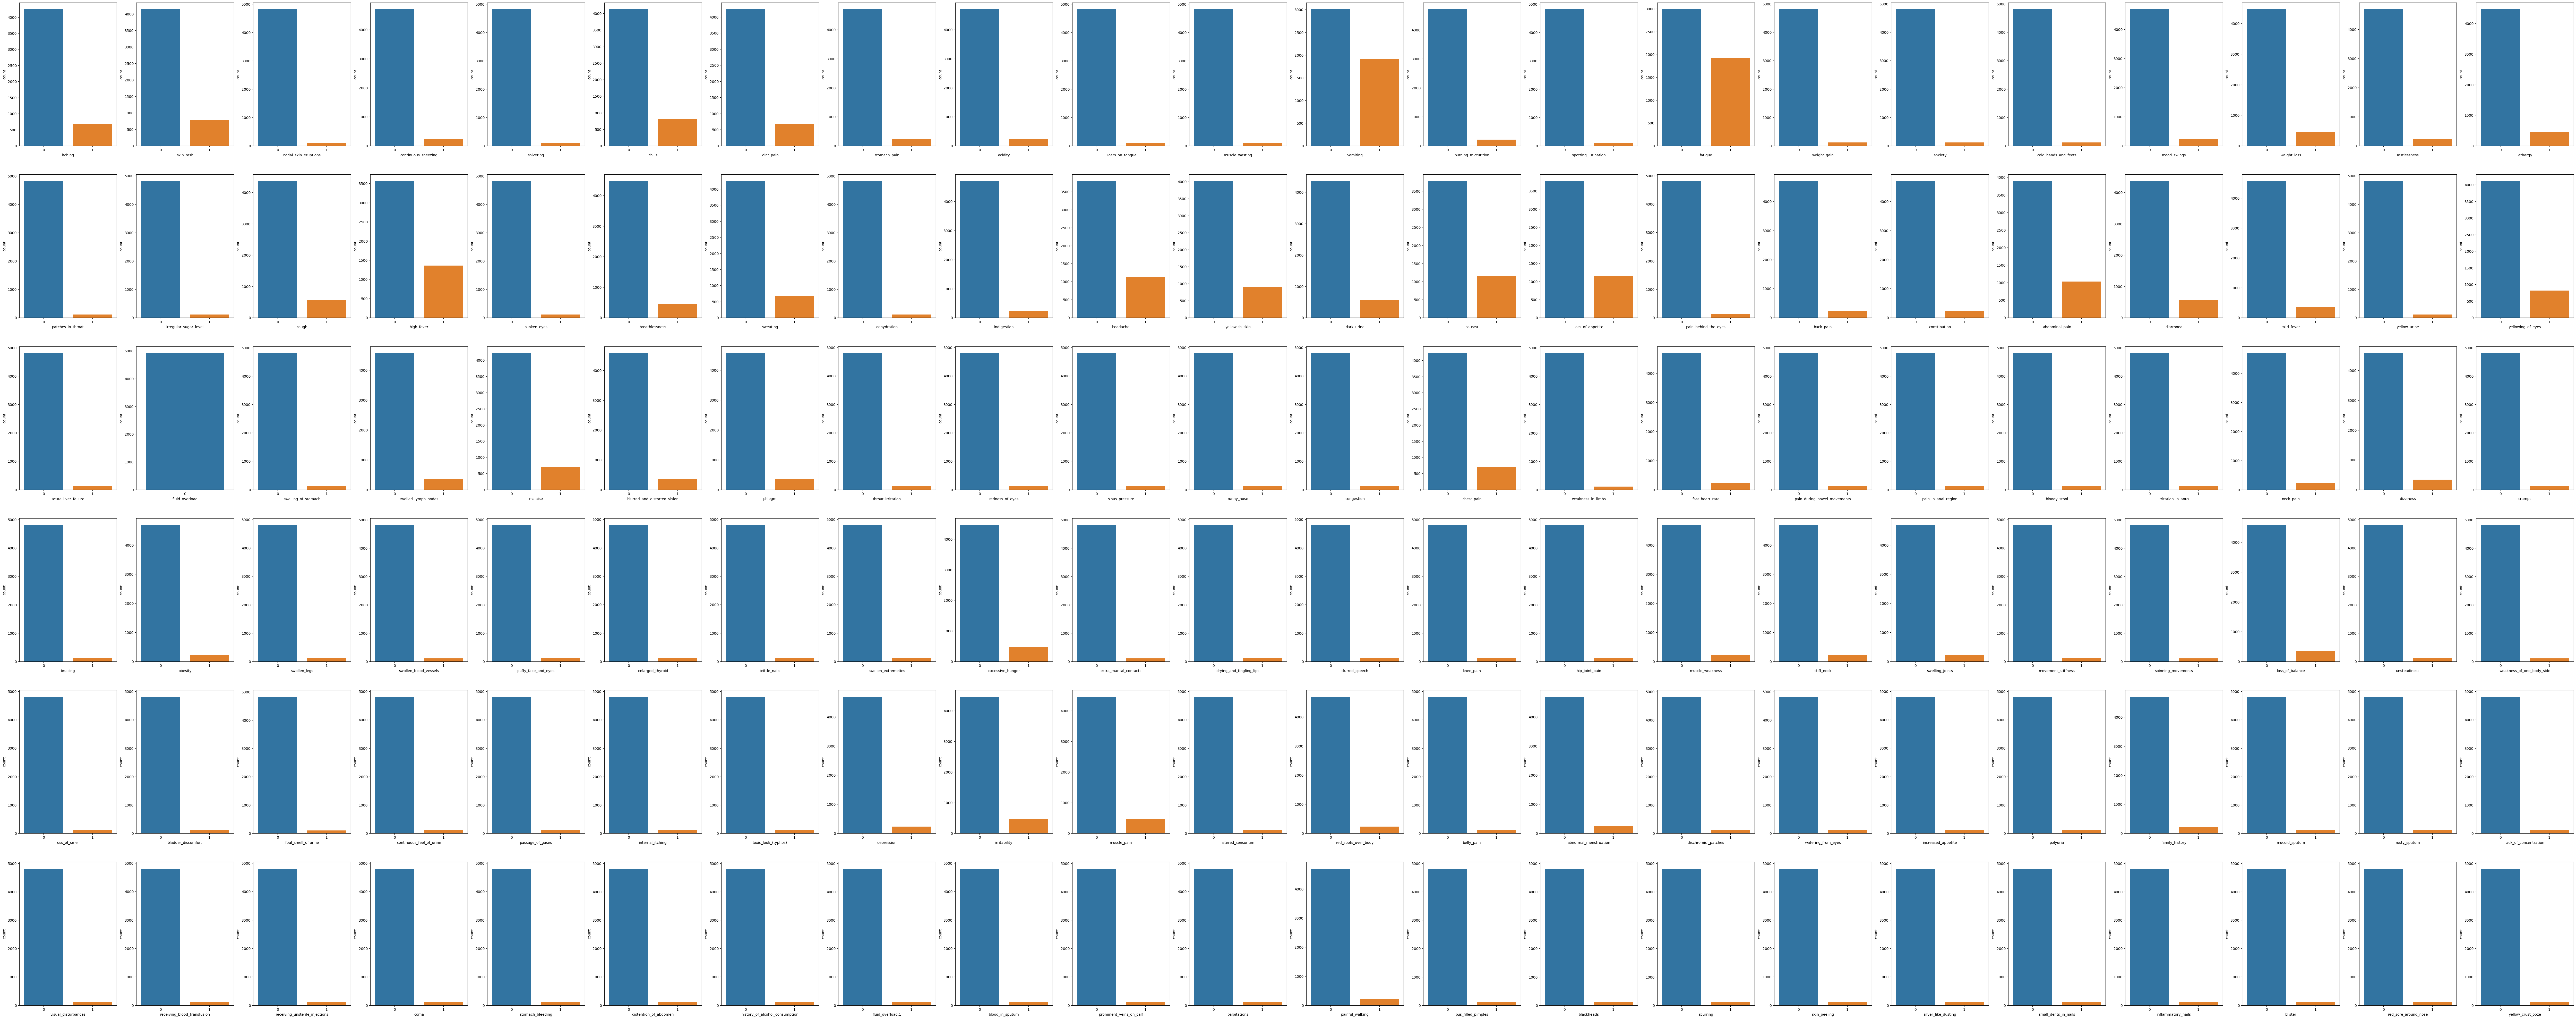

In [16]:

#Analyzing each symptoms/variable
for x in range(df.shape[1]-1):
    plt.subplot(7,22,x+1)
    plt.subplots_adjust(left = 0.5, right = 16 , top = 10, bottom = 0.5)
    sns.countplot(df[df.columns[x]]).set_title(df.columns[x],fontsize=23)

# Split data

In [25]:
x_train = df.drop('prognosis', axis = 1)
y_train = df['prognosis']

x_test = test_df.drop('prognosis',axis=1)
y_test = test_df['prognosis']

# Model train

In [26]:
Accuracy={}

In [27]:
# We will be using classification models as the data is discreate 

### LogisticRegression

In [28]:
Logistic = LogisticRegressionCV()

In [29]:
start_time = time.time()

#training
Logistic.fit(x_train,y_train)

ti = time.time() - start_time

In [30]:
pred = Logistic.predict(x_test)
acc1 = Logistic.score(x_test, y_test)

Accuracy.update({"Logistic Regression":[acc1,ti]})

Accuracy: 100.0%


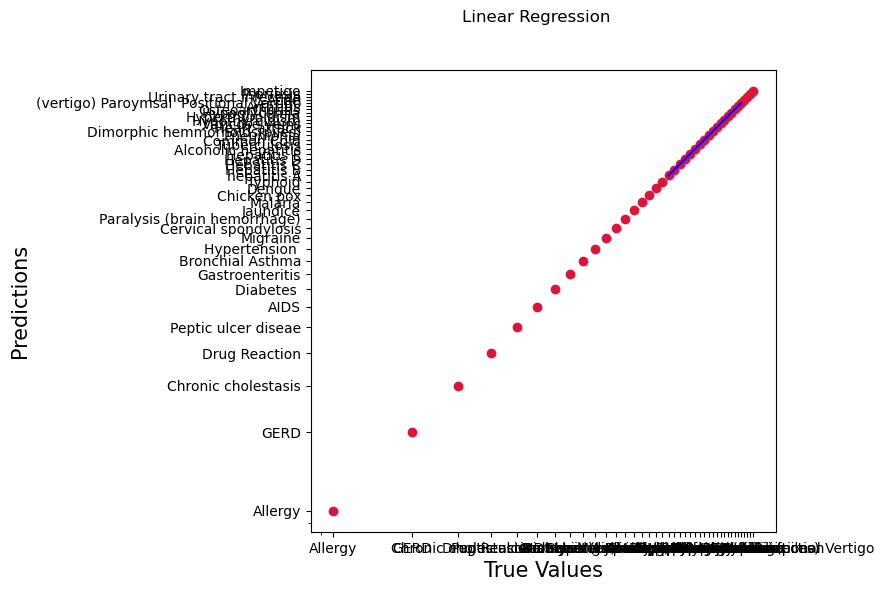

In [31]:
print(f"Accuracy: {acc1*100}%")


plt.figure(figsize=(6,6))
plt.scatter(y_test, pred, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(pred), max(y_test))
p2 = min(min(pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.suptitle('Linear Regression')
plt.axis('equal')
plt.show()

### RandomForest

In [32]:
R_forest = RandomForestClassifier()

start_time = time.time()
#training

R_forest.fit(x_train,y_train)

ti = time.time() - start_time

In [33]:
pred = R_forest.predict(x_test)
acc2 = R_forest.score(x_test,y_test)

Accuracy.update({"RandomForest":[acc2,ti]})

Accuracy: 97.61904761904762%


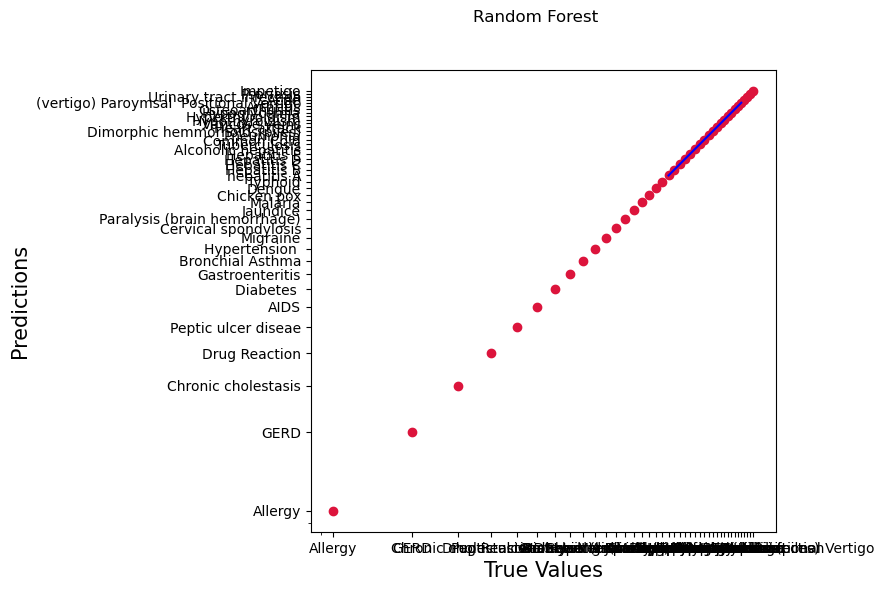

In [34]:
print(f"Accuracy: {acc2*100}%")

plt.figure(figsize=(6,6))
plt.scatter(y_test, pred, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(pred), max(y_test))
p2 = min(min(pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.suptitle('Random Forest')
plt.axis('equal')
plt.show()

### Decision Tree

In [35]:
D_tree = DecisionTreeClassifier()

start_time = time.time()
#training

D_tree.fit(x_train,y_train)

ti = time.time() - start_time

In [36]:
pred = D_tree.predict(x_test)
acc3 = D_tree.score(x_test,y_test)

Accuracy.update({"Decision Tree":[acc3,ti]})

Accuracy: 97.61904761904762%


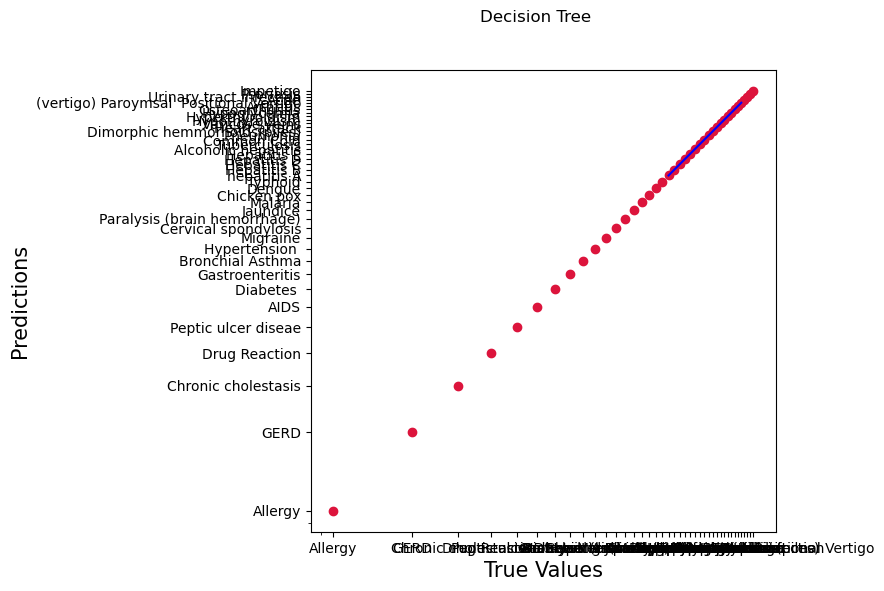

In [37]:
print(f"Accuracy: {acc3*100}%")

plt.figure(figsize=(6,6))
plt.scatter(y_test, pred, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(pred), max(y_test))
p2 = min(min(pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.suptitle('Decision Tree')
plt.axis('equal')
plt.show()

### SVM

In [38]:
svm = SVC()

start_time = time.time()
#training

svm.fit(x_train,y_train)

ti = time.time() - start_time

In [39]:
pred = svm.predict(x_test)
acc4 = svm.score(x_test,y_test)

Accuracy.update({"SVM":[acc4,ti]})

Accuracy: 100.0%


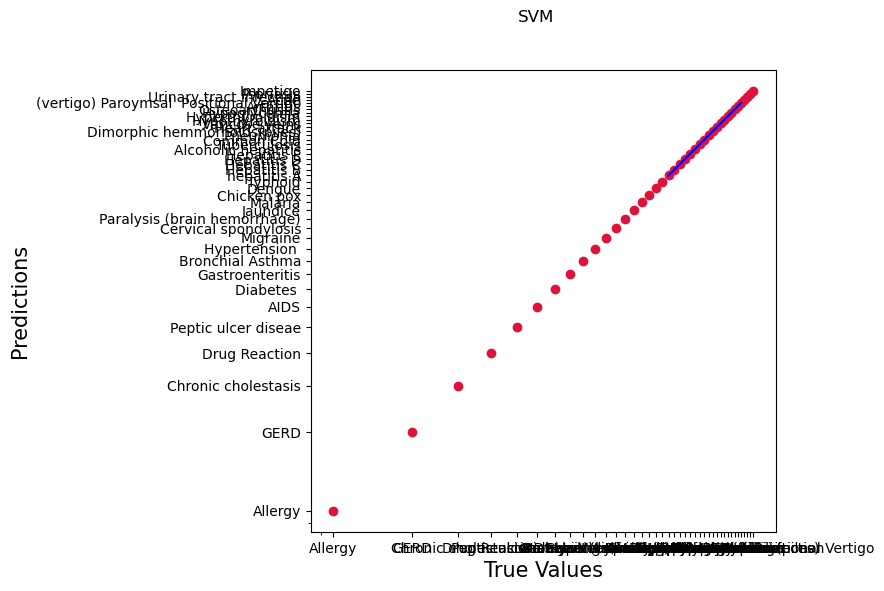

In [40]:
print(f"Accuracy: {acc4*100}%")

plt.figure(figsize=(6,6))
plt.scatter(y_test, pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred), max(y_test))
p2 = min(min(pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.suptitle('SVM')
plt.axis('equal')
plt.show()

### KNN

In [41]:
knn = KNeighborsClassifier()

start_time = time.time()
#training

knn.fit(x_train,y_train)

ti = time.time() - start_time

In [42]:
pred = knn.predict(x_test)
acc5 = knn.score(x_test,y_test)

Accuracy.update({"KNN":[acc5,ti]})

Accuracy: 100.0%


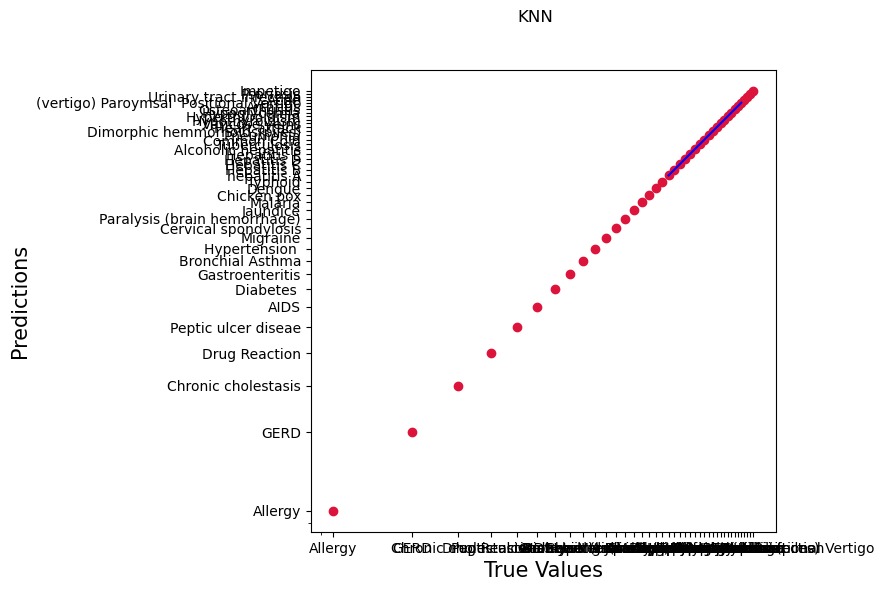

In [43]:
print(f"Accuracy: {acc5*100}%")
plt.figure(figsize=(6,6))
plt.scatter(y_test, pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred), max(y_test))
p2 = min(min(pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.suptitle('KNN')
plt.axis('equal')
plt.show()

### Naive_Bayes

In [44]:
Naive = GaussianNB()

start_time = time.time()
#training

Naive.fit(x_train,y_train)

ti = time.time() - start_time

In [45]:
pred = Naive.predict(x_test)
acc6 = Naive.score(x_test,y_test)

Accuracy.update({"Naive Bayes":[acc6,ti]})

Accuracy: 100.0%


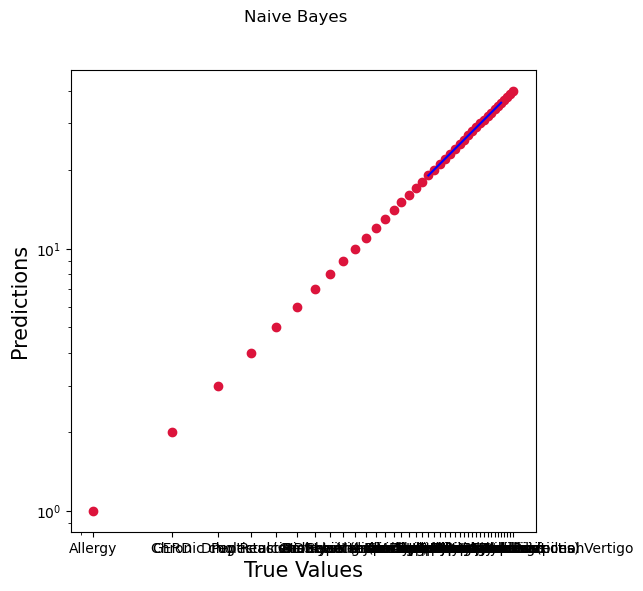

In [46]:
print(f"Accuracy: {acc6*100}%")

plt.figure(figsize=(6,6))
plt.scatter(y_test, pred, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(pred), max(y_test))
p2 = min(min(pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.suptitle('Naive Bayes')
plt.axis('equal')
plt.show()

# Model Analysis

In [47]:
for i in Accuracy:
    print(f"\033[1m {i} " )
    i = Accuracy[i]
    print(f"\033[0m  Accuracy: \033[1;32m {round(i[0]*100,4)}% \033[0m  Time: \033[1;32m {round(i[1],5) }\033[0m  sec ")
    print()

 Logistic Regression 
  Accuracy:  100.0%   Time:  12.68944  sec 

 RandomForest 
  Accuracy:  97.619%   Time:  0.32702  sec 

 Decision Tree 
  Accuracy:  97.619%   Time:  0.03587  sec 

 SVM 
  Accuracy:  100.0%   Time:  0.17951  sec 

 KNN 
  Accuracy:  100.0%   Time:  0.004  sec 

 Naive Bayes 
  Accuracy:  100.0%   Time:  0.016  sec 



# Model Export

In [48]:
# Using SVM model
# using pickle to save the scikitlearn model 

In [58]:
import joblib

In [60]:
#Saving

joblib.dump(knn, 'knn_model.joblib')

['knn_model.joblib']

# Model Loading

In [67]:
model = joblib.load('knn_model.joblib')

In [68]:
#Importing test data
test_df = pd.read_csv("Dataset\Testing.csv")

In [69]:
x_test = test_df.drop('prognosis',axis=1)
y_test = test_df['prognosis']

In [70]:
fin_acc = model.score(x_test,y_test)
print(f"Accuracy: {fin_acc*100}%")

Accuracy: 100.0%


In [95]:
ran = x_test.head(1)
ran

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   

   pus_filled_pimples  blackheads  scurring  skin_peeling  \
0                   0           0         0             0   

   silver_like_dusting  small_dents_in_nails  inflammatory_nails  blister  \
0                    0                     0                   0        0   

   red_sore_around_nose  yellow_crust_ooze  
0                     0                  0  

[1 rows x 132 columns]

In [93]:
pre = model.predict(ran)

print(f'The person may be suffering from {pre[0]}')

The person may be suffering from Fungal infection
